# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [6]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Create a new dataframe from your CSV
df = pd.read_csv('test.csv')

In [7]:
# Print out any information you need to understand your dataframe
print(df.shape)
print(df.dtypes)

#select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(7662, 291)
id                      int64
timestamp              object
full_sq               float64
life_sq               float64
floor                   int64
                       ...   
church_count_5000       int64
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
Length: 291, dtype: object
['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_m

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

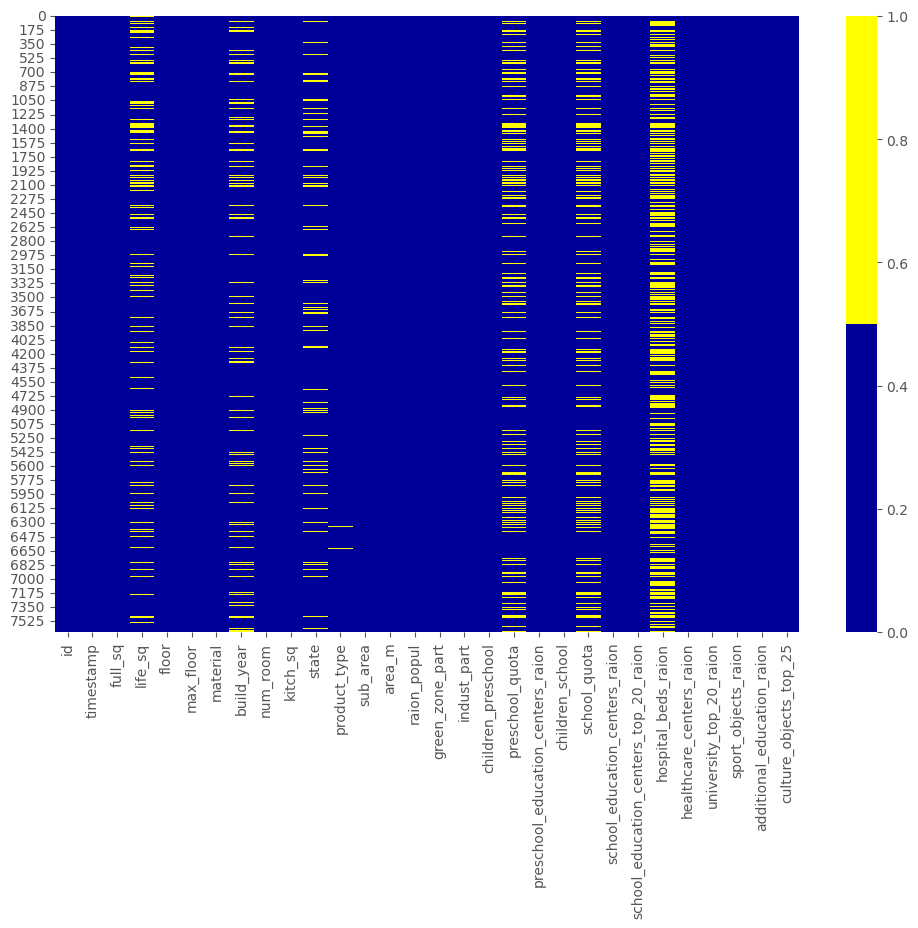

In [8]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
# Try out a missing data percentage list! 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 15%
floor - 0%
max_floor - 0%
material - 0%
build_year - 14%
num_room - 0%
kitch_sq - 0%
state - 9%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 21%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 21%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 45%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0%
wor

created missing indicator for: life_sq
created missing indicator for: build_year
created missing indicator for: state
created missing indicator for: product_type
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raion_build_count_with_builddate_info
created missing indicator for: build_count_before_1920
created missing indicator for: build_count_1921-1945
created miss

<Axes: xlabel='index'>

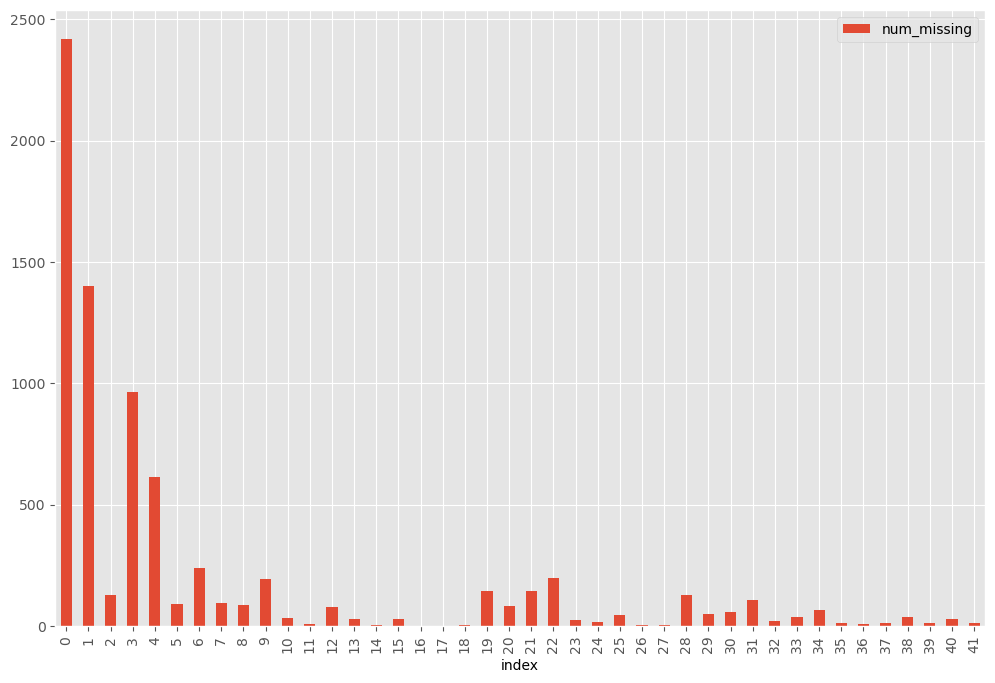

In [10]:
# Plot a missing data histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [11]:
# Handle any missing data in your dataframe.
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<Axes: >

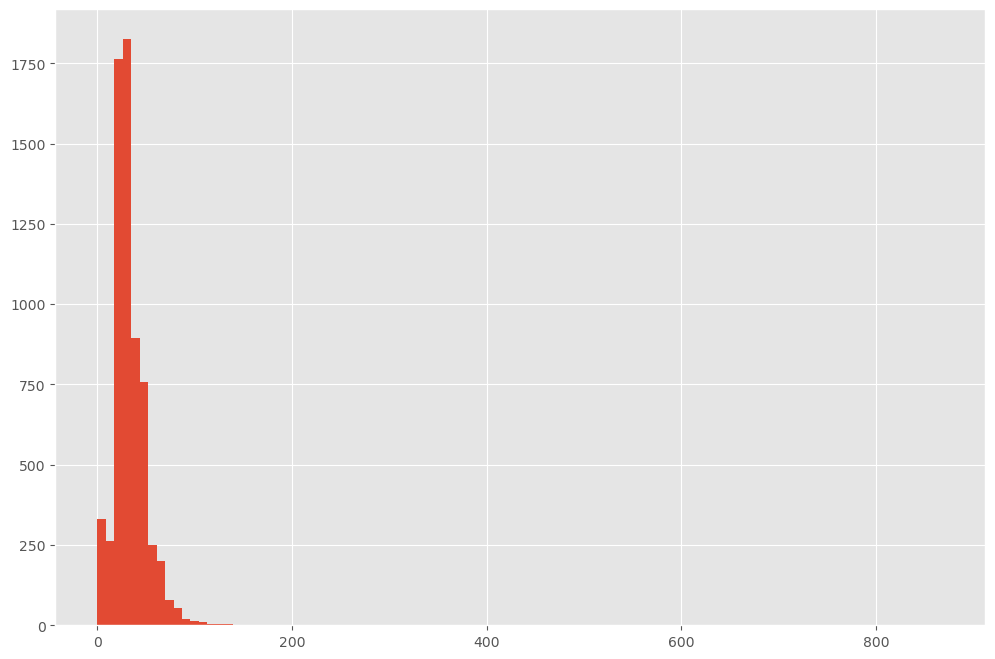

In [12]:
# Plot a histogram to see if there are any outliers.
df['life_sq'].hist(bins=100)

In [13]:
# Use the describe() method
df['life_sq'].describe()

count    6486.000000
mean       32.660037
std        22.737855
min         0.000000
25%        19.900000
50%        30.400000
75%        41.800000
max       869.000000
Name: life_sq, dtype: float64

<Axes: >

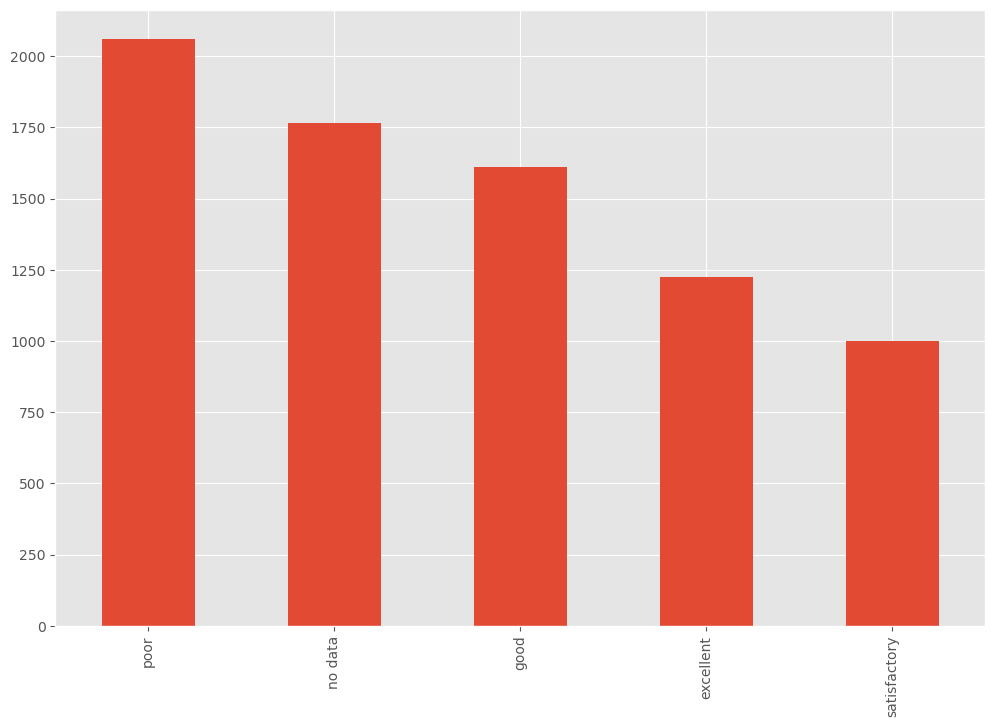

In [14]:
# Plot a bar chart
df['ecology'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [11]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [ ]:
# Look for duplicates. How will you handle any duplicates?

# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [15]:
# Try to convert all the strings in a column to lower or upper case. 
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie vnukovskoe              584
poselenie sosenskoe               297
solncevo                          285
nagatinskij zaton                 244
poselenie moskovskij              229
                                 ... 
molzhaninovskoe                     1
poselenie krasnopahorskoe           1
poselenie mihajlovo-jarcevskoe      1
poselenie kievskij                  1
poselenie marushkinskoe             1
Name: sub_area_lower, Length: 145, dtype: int64